# '05_decision_tree.ipynb'

Decision Tree

    Decision Tree

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

wine = pd.read_csv('./wine.csv')

wine.info()
wine.describe()

# ph가 1씩 차이가 나면 사람이 죽어 그래서 편차가 적다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X = wine[['alcohol','sugar','pH']].to_numpy()
y = wine['class'].to_numpy()

# 훈련:테스트 = 8:2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((5197, 3), (1300, 3))

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)



In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
print('훈련점수:', lr.score(X_train_scaled,y_train))
print('테스트점수:', lr.score(X_test_scaled,y_test))

print(lr.classes_)
lr.predict_proba(X_test_scaled[:5])

print(lr.coef_,lr.intercept_)

# 로지스틱 회귀도 결국에는 선긋기인데 직선으로 함수를 그리는거네


훈련점수: 0.7808350971714451
테스트점수: 0.7753846153846153
[0. 1.]
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print('훈련점수:', dt.score(X_train_scaled,y_train))
print('테스트점수:', dt.score(X_test_scaled,y_test))

print(np.count_nonzero(y_train))



훈련점수: 0.996921300750433
테스트점수: 0.8407692307692308
3939


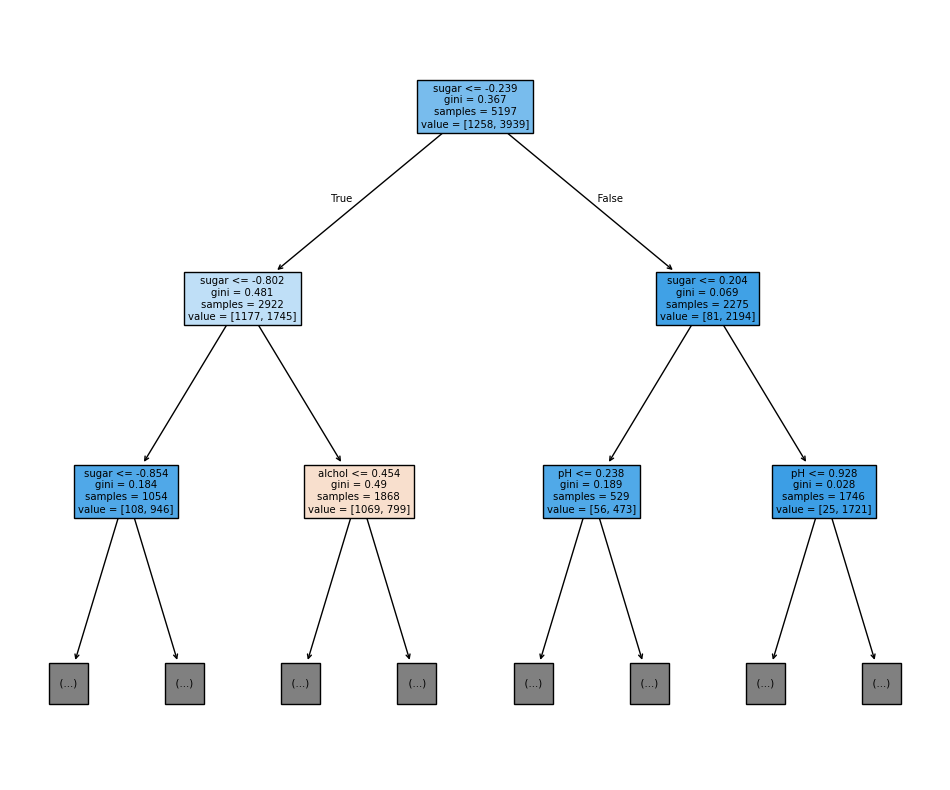

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alchol','sugar','pH']) # 스케일링된 상태의 값
plt.show()

# gini : 불순도, 얼마나 잘 분리되었는지  
# value 뜻이 뭘까? value의 총합은 salples와 같다. True/False가 아니라 trainset 기반으로 (레드, 와인으로 )분류한거라고


# 지금껀 column들끼리 관련된 종합적인 기준을 사용하지 않으니깐 스케일링이 필요 없었다.
# sample을 다 사용 했거나 gini가 바뀌지 않거나 사람이 지정한 만큼 도달하면 멈춘다.





max_depth: 1
훈련 점수:  0.7579372715027901
테스트 점수:  0.7376923076923076
--------------------
max_depth: 2
훈련 점수:  0.8098903213392342
테스트 점수:  0.7961538461538461
--------------------
max_depth: 3
훈련 점수:  0.8454877814123533
테스트 점수:  0.8415384615384616
--------------------
max_depth: 4
훈련 점수:  0.8572253223013276
테스트 점수:  0.8484615384615385
--------------------
max_depth: 5
훈련 점수:  0.8672310948624207
테스트 점수:  0.8607692307692307
--------------------
max_depth: 6
훈련 점수:  0.8766596113142198
테스트 점수:  0.8530769230769231
--------------------
max_depth: 7
훈련 점수:  0.8895516644217818
테스트 점수:  0.8638461538461538
--------------------
max_depth: 8
훈련 점수:  0.9003271117952665
테스트 점수:  0.8584615384615385
--------------------
max_depth: 9
훈련 점수:  0.9130267461997306
테스트 점수:  0.8484615384615385
--------------------
max_depth: 10
훈련 점수:  0.9291899172599577
테스트 점수:  0.8461538461538461
--------------------


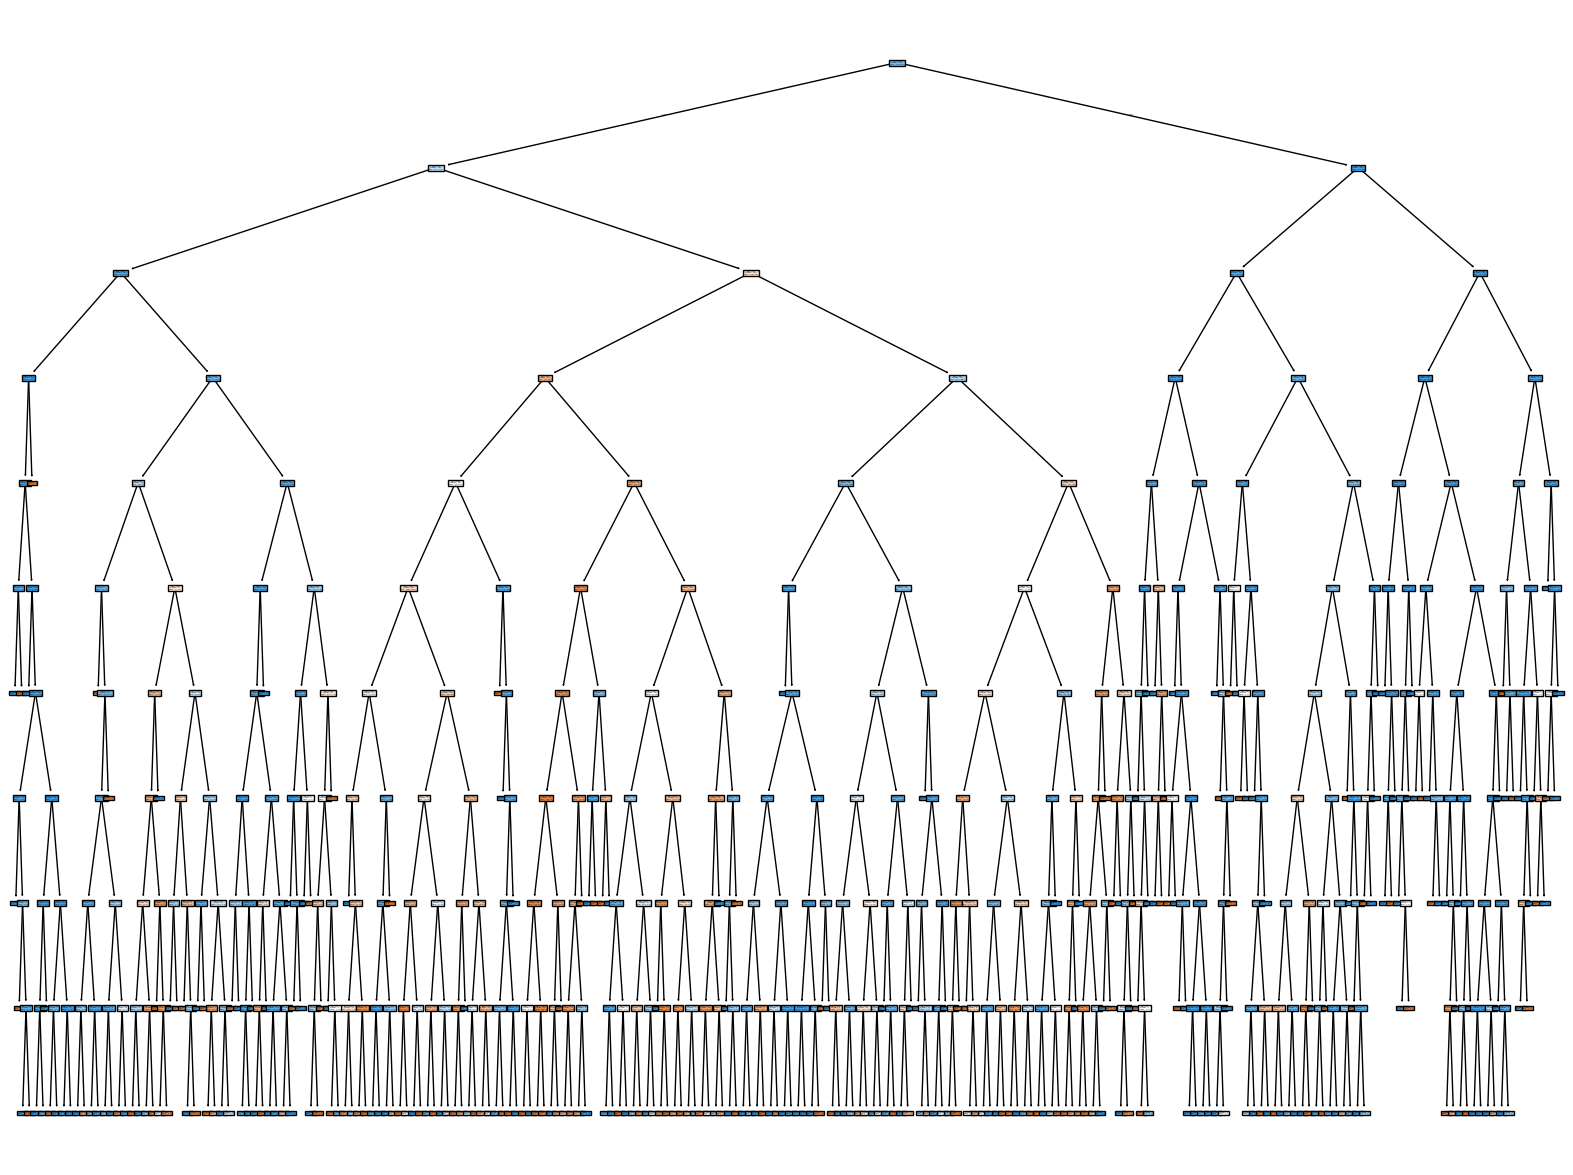

In [16]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# max_depth 값을 1부터 10까지 반복합니다.
for i in range(1, 11):
    # DecisionTreeClassifier 모델 생성. max_depth는 i 값으로 설정
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    
    # 모델 학습
    dt.fit(X_train, y_train)
    
    # 훈련 및 테스트 점수 출력
    print(f'max_depth: {i}')
    print('훈련 점수: ', dt.score(X_train, y_train))
    print('테스트 점수: ', dt.score(X_test, y_test))
    print('-' * 20)

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
for i in range

dt.fit(X_train, y_train)
print('훈련점수: ', dt.score(X_train, y_train))
print('테스트점수: ', dt.score(X_test, y_test))

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

SyntaxError: invalid syntax (2704887291.py, line 2)

# 교차 검증 (Cross Validation)

- 테스트 점수를 높이기 위해서 파라미터 조정을 하는게 맞는걸까? 
- 테스트 셋은 모델 검증 마지막 단계에서 1번만 확인하고 받아들여야 한다?


In [ ]:
# 훈련셋(sub) | 검증셋(val) | 테스트셋(test)
# 80%                      20%
# 60%           16%        20%

In [ ]:
wine = pd.read_csv('./wine.csv')
X = wine[['alcohol','sugar','pH']]
y = wine['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) # 42는 그냥 많이 써서 쓰는거라고


In [ ]:
X_sub, X_val, y_sub, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42) # 42는 그냥 많이 써서 쓰는거라고


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub, y_sub)
print('훈련:',dt.score(X_sub,y_sub))
print('검증:',dt.score(X_val,y_val))


훈련: 0.9969207082371054
검증: 0.8607692307692307


In [ ]:
#. K-Fold Cross Validation () : 데이터를 쪼개서 훈련/검증 데이터를 교차 전환하며 검증 진행 -> 점수 평균

from sklearn.model_selection import cross_validate 

scores = cross_validate(dt, X_train, y_train) # 기본값이 5인데 인자를 바꿀 수 있을까?
display(scores)

# 5등분한 것 중에서 1등분을 빼고 했다는거다.
# {'fit_time': array([0.02038097, 0.0056572 , 0.00564098, 0.00516891, 0.00633097]),
#  'score_time': array([0.00148892, 0.00077176, 0.00093699, 0.00074005, 0.00168395]),
#  'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

print(np.mean(scores['test_score']))



{'fit_time': array([0.02097416, 0.00489783, 0.00494623, 0.00453401, 0.00476813]),
 'score_time': array([0.00200987, 0.00087619, 0.00075698, 0.00093269, 0.00091696]),
 'test_score': array([0.86826923, 0.86826923, 0.8825794 , 0.86717998, 0.85370549])}

0.8680006663211668


In [ ]:
# 폴드 기본값 5가 아닌 다른 값을 쓰고 싶은 경우는  
from sklearn.model_selection import StratifiedGroupKFold # 얘가 내부적인 애 

splitter = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42) # 폴딩을 할 때 마다 접기 전에 셔플링을 한다는 것 
scores = cross_validate(dt, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))


# 강사님이 오타 있으신듯



nan


# 하이퍼 파라미터 튜닝

1. GridSearch를 진행 할 하이퍼 파라미터 선택
2. 그리드 서치 수행(fit)
3. 최적 조합을 찾고, 'gs'객체에 저장됨
4. 그리드 서치는 최상의 매개변수에서, 전체 훈련 세트를 사용해 최종 결정

In [ ]:
from sklearn.model_selection import GridSearchCV # 얘가 최적의 하이퍼 파리미터를 찾아줌

params = {
    'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005] # 딕셔너리 형태여야 

}
                    # 모델,                                     
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid= params,                 
    n_jobs = -1                        # CPU 코어 개수 최대
    )

gs.fit(X_train, y_train)

# Grid Search 결과 가장 좋은 파라미터 조합으로 모델 만들기
print(gs.best_params_,gs.cv_results_['mean_test_score'])
print(gs.best_params_)

dt = gs.best_estimator_
dt.score(X_train, y_train)



{'min_impurity_decrease': 0.0001} [0.86800067 0.86453617 0.86492226 0.86780891 0.86761605]
{'min_impurity_decrease': 0.0001}


0.9615162593804117

In [ ]:
params = {
    'min_impurity_decrease': np.arange(0.0001,0.001, 0.0001), # 노드 분할을 위한 최소 불순도
    'max_depth' : range(5,20,1), #. 트리 깊이
    'min_samples_split' : range(2,100,10) # 노드를 나누기 위한 최소 샘플 수
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1) # params가 뭔지 아직도 잘 모르겠다.
gs.fit(X_train, y_train)

print(gs.best_params_)


{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
# 내부 교차검증 결과 가장 높은 평균 점수
np.max(gs.cv_results_['mean_test_score'])

# 모든 하이퍼파리미터 교차검증 끝에 찾은 최고의 모델
dt_best = gs.best_estimator_

# 로 아껴놨던 테스트 진행 -> 점수
dt_best.score(X_test,y_test) 

0.8615384615384616

In [ ]:
# 위에서 params를 썼던거 관련

from scipy.stats import uniform,randint 

# 주어진 범위에서 고르게 값을 뽑는다. (randint -> 정수, uniform -> 실수 )
rgen = randint(0,10)

# 다음 과정은 인스턴스를 만드는 것, 괄호 안에 인자가 들어가면 대부분 인스턴스 곧 클래스 기반으로 이해하면 되려나?
rgen.rvs(10)

print(rgen.rvs(10))
print(np.unique(rgen.rvs(1000), return_counts=True))

print(ugen.rvs(10))

# 에러 잘 모르겠는데 일단 넘어가고
  

[6 7 8 4 9 7 8 2 4 8]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([103,  92,  90, 112,  94,  92,  94, 111, 106, 106]))
[0.19088523 0.38411899 0.45549618 0.69714666 0.63171741 0.06710018
 0.14611775 0.90063584 0.84240109 0.04604705]


In [19]:
params = {
    'min_impurity_decrease': uniform(0.0001, 0.001), # 노드 분할을 위한 최소 불순도
    'max_depth' : randint(20,50), #. 트리 깊이
    'min_samples_split' : randint(2,25), # 노드를 나누기 위한 최소 샘플 수
    'min_samples_leaf' : randint(1,25) # 리프 노드 개수 최소값
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_iter=100,
    n_jobs=-1,
    random_state=42
)

gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
gs.best_score_
# 결정트리 모델 인스턴스

dt = gs.best_estimator_

print('최종 테스트 결과: ', dt.score(X_test, y_test))



# 예측을 할 때는 마지막 노드의 평균으로 구해버린다.



최종 테스트 결과:  0.86
